# Sales-market data analysis

### Context: Here I have taken a sales dataset from kaggle for analysis.

### Here is a list of description associated with the dataset:

A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday U.S. usage, however, "grocery store" is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.

Content
In the dataset, You'll get data of different stores of a supermarket company as per their store IDs which for ease has been converted to positive integers.

Store ID: (Index) ID of the particular store.

Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

#### DailyCustomerCount: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.
#### Acknowledgement
The data is obtained from the project from the University after seeking proper permission.

Inspiration
Analyzing the performances of stores in the past on basis of which will try to rectify defects as well as to leverage the positives. Who doesn't want to increase their profits right?



## Downloading the Dataset
lets just download the dataset and use it to load the data

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# sales data
dataset_url = 'https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joeljozzz
Your Kaggle Key: ········


100%|██████████| 9.60k/9.60k [00:00<00:00, 8.49MB/s]

The dataset has been downloaded and extracted.

In [4]:
# setting the directory
data_dir = './stores-area-and-sales-data'

In [5]:
import os
os.listdir(data_dir)

['Stores.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-starter" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joeljo2201/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joeljo2201/zerotopandas-course-project-starter


'https://jovian.ai/joeljo2201/zerotopandas-course-project-starter'

## Data Preparation and Cleaning
Before we work with analysis we need to explore and get rid of unnecessary data.



In [23]:
import pandas as pd
import numpy as np

In [24]:
df=pd.read_csv("./stores-area-and-sales-data/Stores.csv")

In [25]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [27]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [28]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [29]:
#checking to see if there is null data
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [30]:
df.rename(columns={'Store ID ': "Store_ID"}, inplace=True)

In [32]:
#removing the store id temporarily for the correlation plot
# and storing the sequence in Store_id variable for further use
Store_id=df.pop('Store_ID')

# instead of using: df.drop('Store_ID',axis=1,inplace=True)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


In [33]:
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joeljo2201/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joeljo2201/zerotopandas-course-project-starter


'https://jovian.ai/joeljo2201/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

exploring various features of the dataset


> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exploring the sales

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


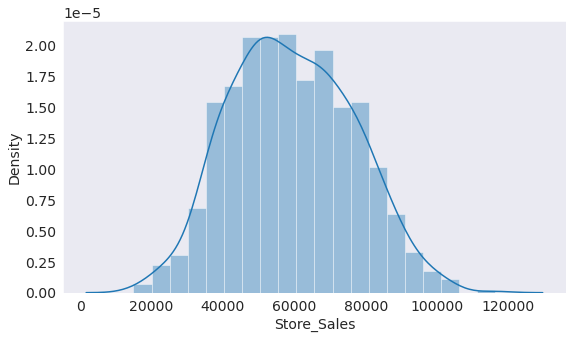

In [37]:
sns.distplot(df['Store_Sales'])
plt.grid()
plt.show()

checking different types of plots using pairplot 


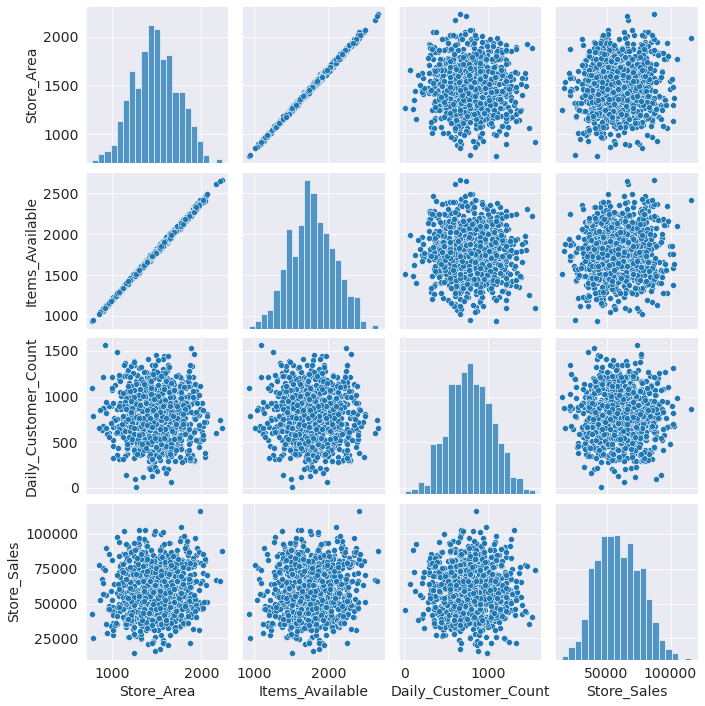

In [38]:
sns.pairplot(df)
plt.show()

using a heat chart to display correlation between the different fields

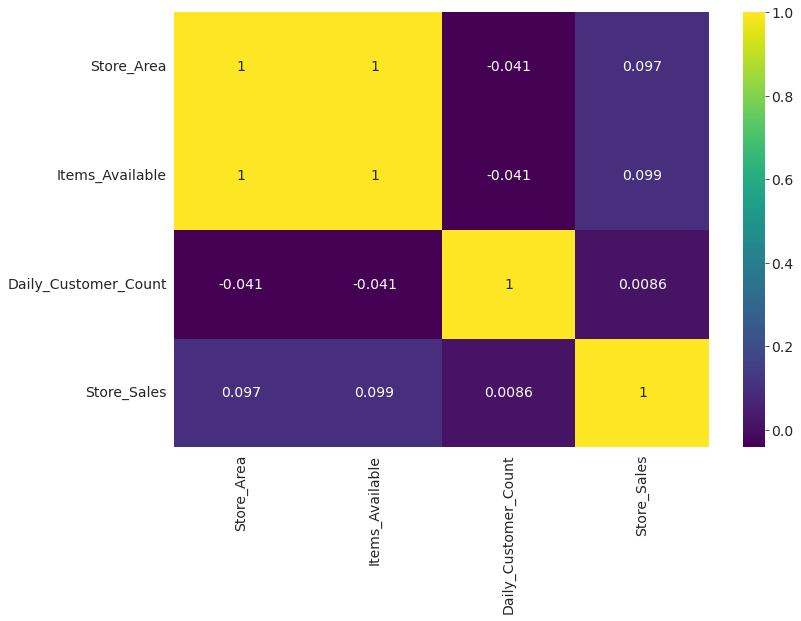

In [39]:
plt.figure(figsize=(12,8))
cor= df.corr()
sns.heatmap(cor, annot = True, cmap='viridis')
plt.show()

In [40]:
# adding back our store_id for further use
df.insert(0,'Store_ID', Store_id)

Store sales for top 10 stores

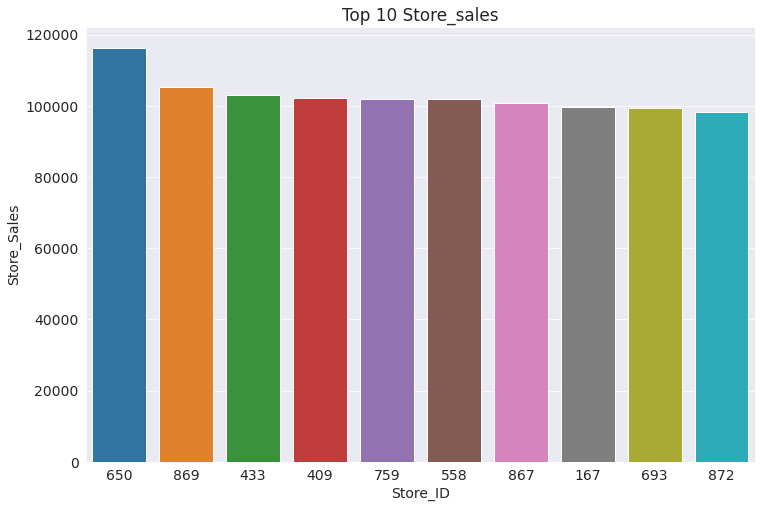

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Store_ID', y='Store_Sales',
            order=df.sort_values('Store_Sales', ascending=False)[:10].Store_ID)
plt.title('Top 10 Store_sales')
plt.show()

Let us save and upload our work to Jovian before continuing

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joeljo2201/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joeljo2201/zerotopandas-course-project-starter


'https://jovian.ai/joeljo2201/zerotopandas-course-project-starter'

## Asking and Answering Questions

lets ask some questions and answer them below



#### Q1: How many customers visit the store on average?

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Density'>

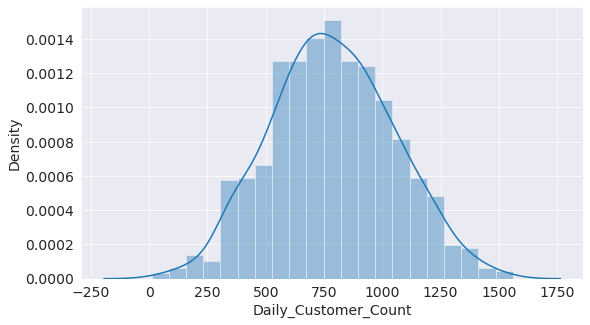

In [44]:
sns.distplot(df['Daily_Customer_Count'])

#### we can see around 800 customers visit the stores on average

#### Q2: list the top 10 stores with highest monthly customer counts

[Text(0.5, 1.0, 'Top 10 Stores with highest monthly customer counts')]

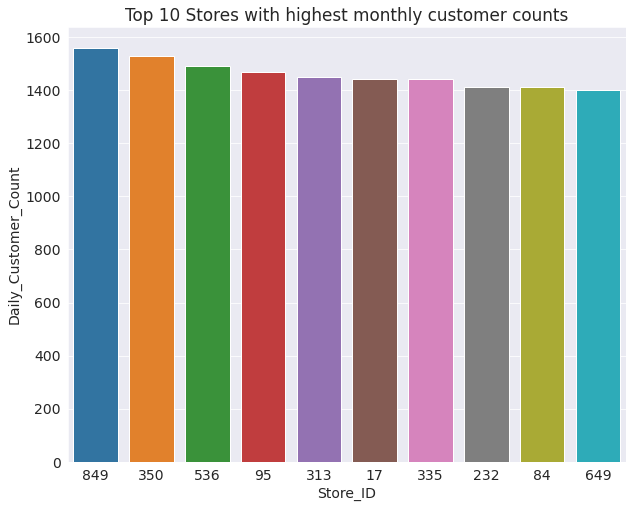

In [45]:
plt.figure(figsize = (10,8))
sns.barplot(data=df, x='Store_ID', y='Daily_Customer_Count', order=df.sort_values('Daily_Customer_Count', ascending=False)[:10].Store_ID).set(title='Top 10 Stores with highest monthly customer counts')

#### Q3: what is the highest sale recorded and in which store is it seen


In [46]:
highest_sale= df['Store_Sales'].max()
i= df['Store_Sales'].idxmax()
storenumber=df['Store_ID'][i]

In [47]:
print("The highest sale recorded is:",highest_sale, "In Store number:",storenumber)

The highest sale recorded is: 116320 In Store number: 650


#### Q4: Which store has the minimum number of people visiting it and what is the count for this store?

In [48]:
minimum_cust=df['Daily_Customer_Count'].min()
i= df['Daily_Customer_Count'].idxmin()
storenumber=df['Store_ID'][i]

In [49]:
print("The store with the minimum number of customers is:",storenumber, "And the least customer count is:",minimum_cust)

The store with the minimum number of customers is: 40 And the least customer count is: 10


#### Q5: what about the sales based on items available?

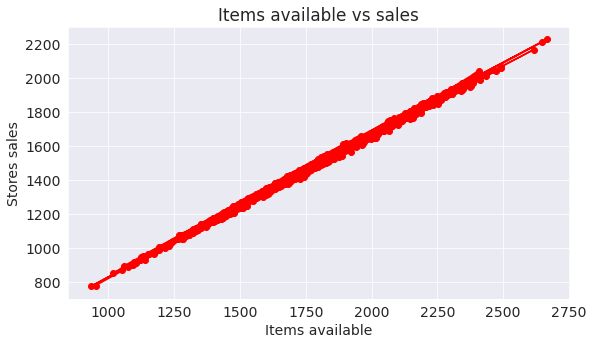

In [50]:
x= df.Items_Available
y= df.Store_Area
# plt.plot(x,y,'r')
plt.plot(x,y,'r-o')
plt.title('Items available vs sales')
plt.xlabel('Items available')
plt.ylabel('Stores sales')
plt.show()

Let us save and upload our work to Jovian before continuing.

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joeljo2201/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joeljo2201/zerotopandas-course-project-starter


'https://jovian.ai/joeljo2201/zerotopandas-course-project-starter'

## Inferences and Conclusion

hence we explored sales data and analyzed it with respect to different stores

In [53]:
import jovian

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joeljo2201/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joeljo2201/zerotopandas-course-project-starter


'https://jovian.ai/joeljo2201/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [55]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>